# Dubizzle Used Cars Web Scraping 
## Author: Olivia Hinson
## Date: 5/13/2024

In [110]:
# !pip install selenium

In [5]:
# Import library packages
from selenium import webdriver # Create driver to help scrape websites 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

import pandas as pd 
import warnings
import time

In [111]:
# Define the website to scrape (Dubizzle used cars)
website = 'https://uae.dubizzle.com/motors/used-cars/'
# Define path where we downloaded Chrome driver
import platform
from os import getcwd

match platform.system():
    case 'Linux':
        path = getcwd()+'/chromedriver-linux64/chromedriver'
    case 'Darwin':
        match platform.machine():
            case 'x86_64':
                path = getcwd()+'/chromedriver-mac-x64/chromedriver'
            case 'arm64':
                path = getcwd()+'/chromedriver-mac-arm64/chromedriver'
    case 'Windows':
        path = r'C:\\Selenium\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe

In [112]:
# Set available options (if applicable)
options = webdriver.ChromeOptions()
options.headless = True; 
warnings.filterwarnings('ignore')

# Initializing Google Chrome webdriver from local host as driver 
cService = webdriver.ChromeService(executable_path=path)
driver = webdriver.Chrome(options=options, service=cService)
driver.get(website)
time.sleep(3)

**Opens new Google Chrome window with full website**

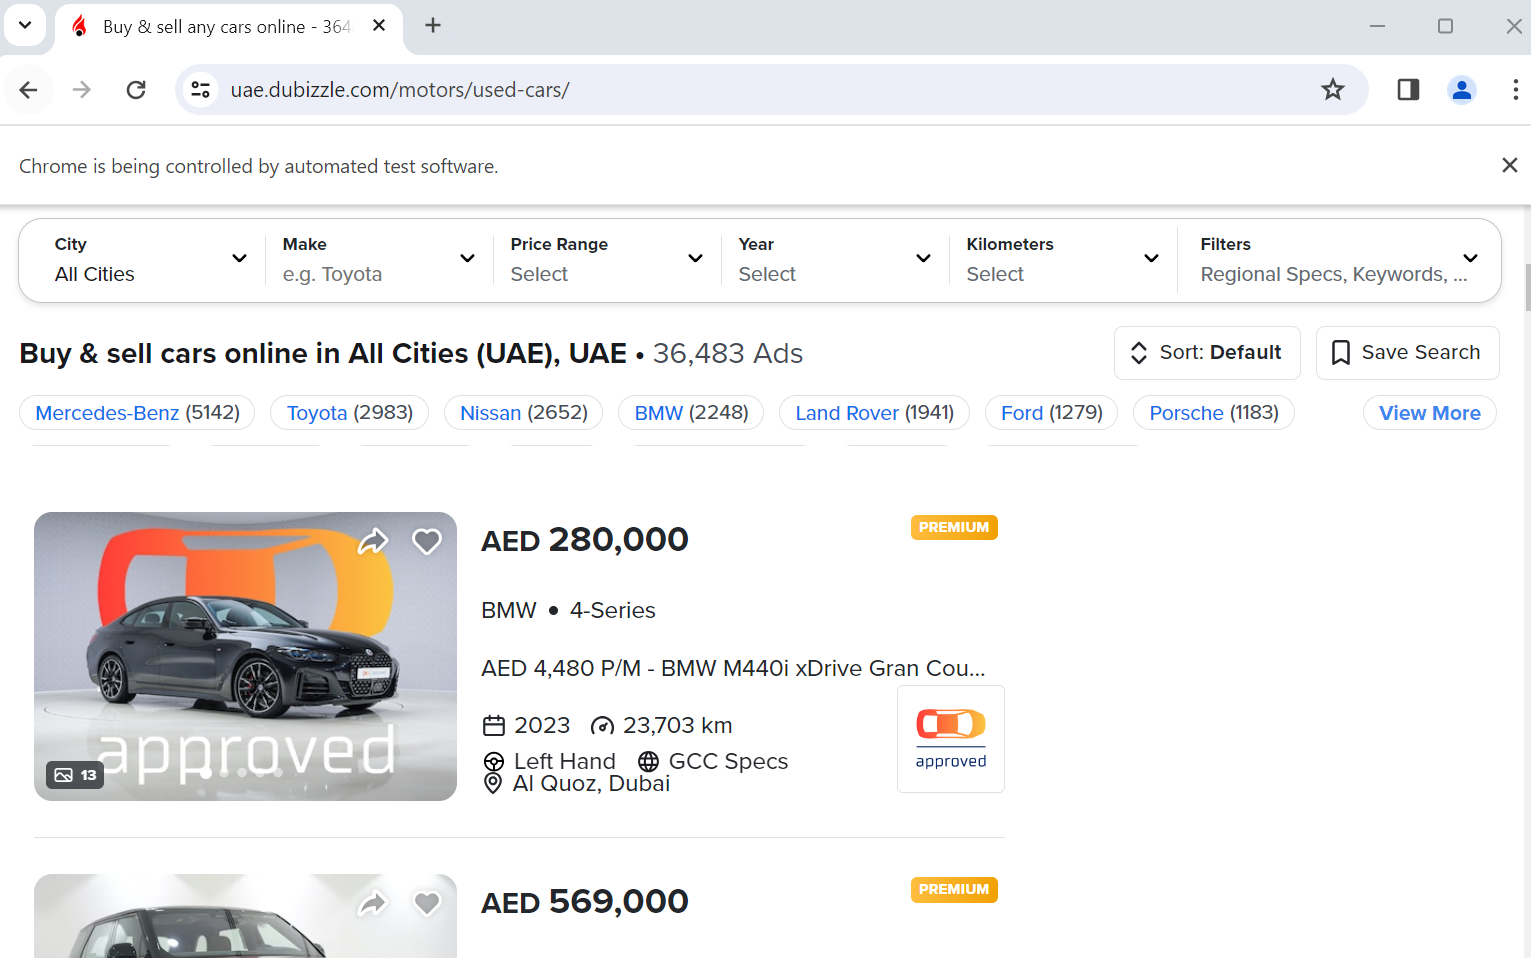
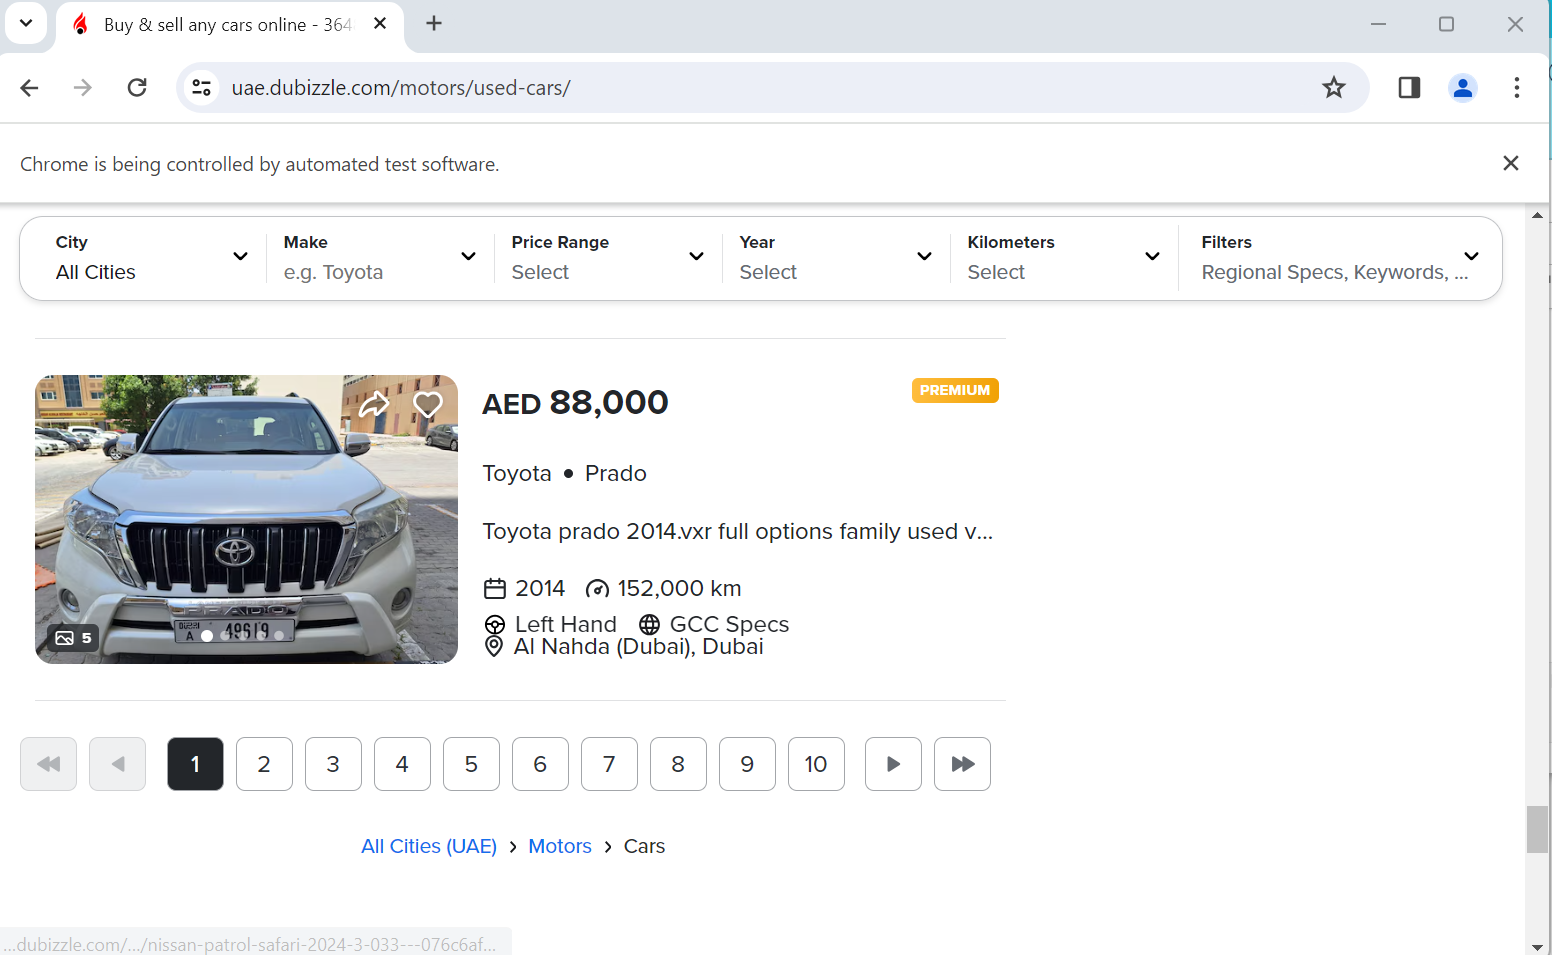
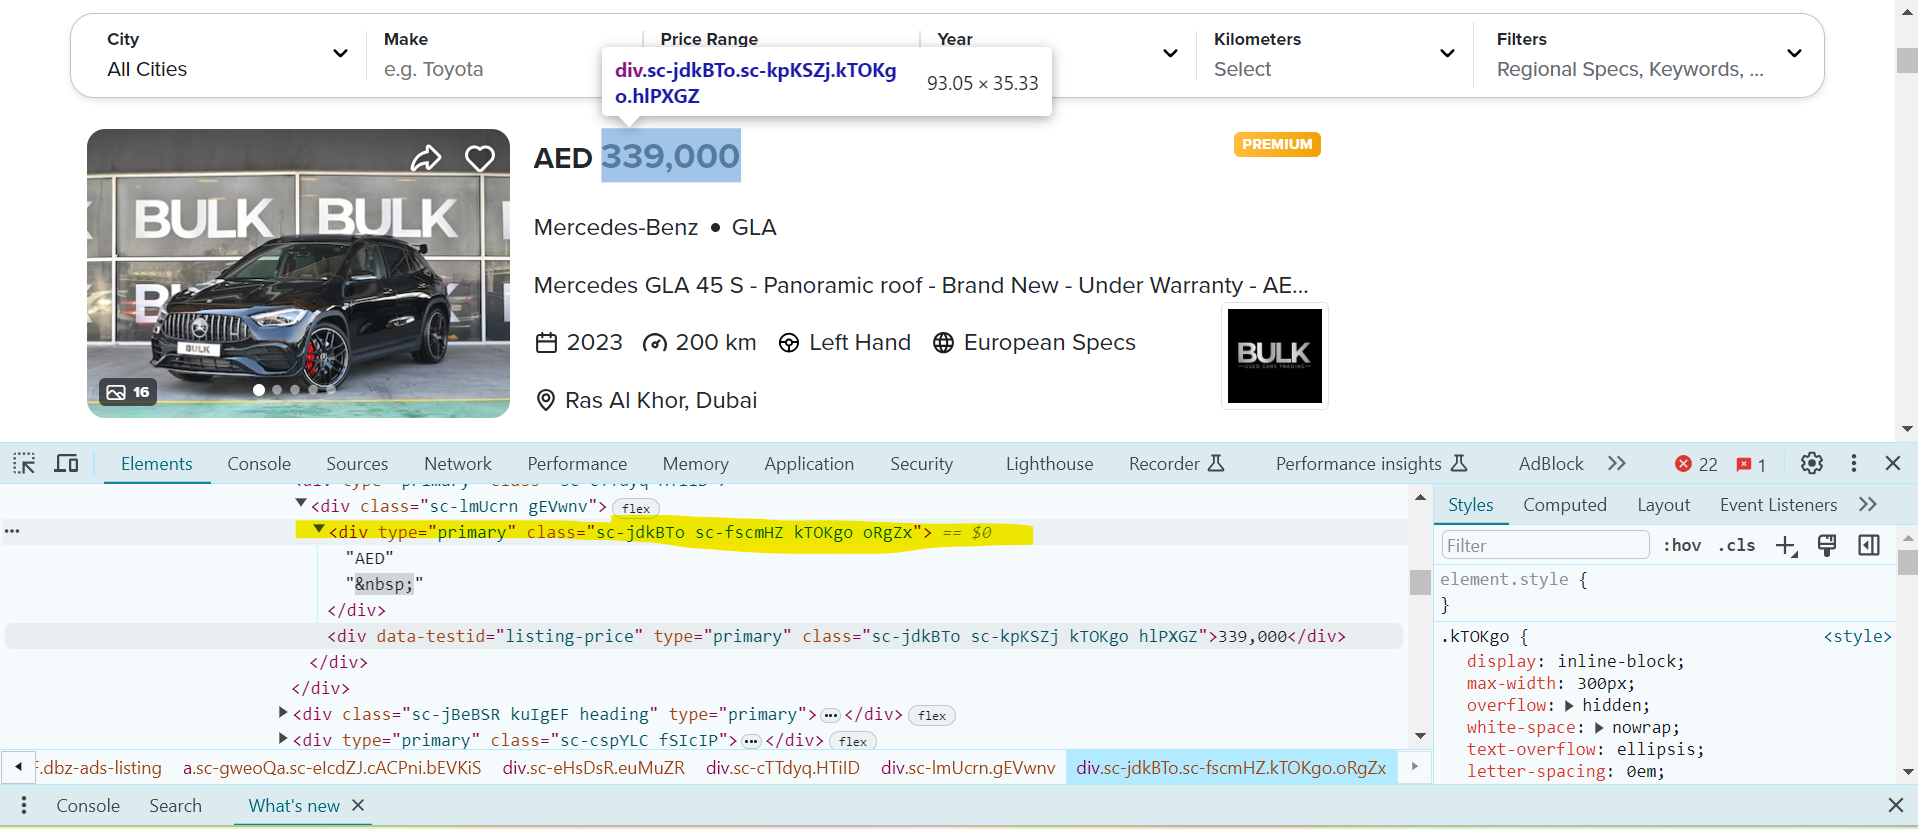

**Observations about site**
1. Website has data about used cars
2. Data is not stored in tables, but as a listing of div tags. 
3. Search functionality to search for a certain City, Make, Price Range, Year, Kilometers, and other Filteres

In [125]:
# Retrieve number of pages on a given page
number_of_pages = driver.find_elements(By.XPATH,'//*[@id="listings-container"]/div[3]/div/div[2]/a')
print(len(number_of_pages))

10


In [149]:
# Extract data from a listing
listings = driver.find_elements(By.XPATH, '//*[@id="listing-card-wrapper"]/div')

# Create separate lists for each column in table 
price = []

wait = WebDriverWait(driver, 10)
# Iterate through pages
for page_num in range(len(number_of_pages)): 
    # Iterate over list
    for ad in listings: 
        listing_price = ad.find_element(By.XPATH, './/div[@data-testid="listing-price"]').text
        price.append(listing_price)
        print(listing_price)

    # Locate element with selenium 
    next_page_button = driver.find_element(By.XPATH, '//a[@class="sc-lizKOf bzkMkX next_button"]')
    # Almost guaranteed method for clicking the button without issue
    driver.execute_script("arguments[0].click()", next_page_button)

74,500
66,800
79,500
42,500
38,800
18,900
18,500
41,500
21,500
21,500
79,000
67,000
85,000
665,000
1,049,000
359,000
909,000
2,599,000
919,000
1,100,000
2,599,000
1,349,000
4,599,000
599,000
1,179,000


StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=124.0.6367.202); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF740221562+60802]
	(No symbol) [0x00007FF74019AC62]
	(No symbol) [0x00007FF740057CE4]
	(No symbol) [0x00007FF74005DE26]
	(No symbol) [0x00007FF7400601DB]
	(No symbol) [0x00007FF740060280]
	(No symbol) [0x00007FF7400A6A11]
	(No symbol) [0x00007FF7400A6E1C]
	(No symbol) [0x00007FF74009A8FC]
	(No symbol) [0x00007FF7400CABBF]
	(No symbol) [0x00007FF74009A7C6]
	(No symbol) [0x00007FF7400CAD90]
	(No symbol) [0x00007FF7400EA224]
	(No symbol) [0x00007FF7400CA923]
	(No symbol) [0x00007FF740098FEC]
	(No symbol) [0x00007FF740099C21]
	GetHandleVerifier [0x00007FF7405241FD+3217949]
	GetHandleVerifier [0x00007FF740566197+3488183]
	GetHandleVerifier [0x00007FF74055F11F+3459391]
	GetHandleVerifier [0x00007FF7402DB926+823622]
	(No symbol) [0x00007FF7401A5FFF]
	(No symbol) [0x00007FF7401A0F24]
	(No symbol) [0x00007FF7401A10B2]
	(No symbol) [0x00007FF740191904]
	BaseThreadInitThunk [0x00007FFE3AB7257D+29]
	RtlUserThreadStart [0x00007FFE3CDEAA48+40]


In [ ]:
# Quit using the Google Chorme webdriver when done
driver.quit()